# Day12 Data Visualization Tools: Seaborn 
# 視覺化資料工具：Seaborn

Seaborn是基於Matplotlib的Python繪圖庫，並有繪圖指令簡單、圖樣風格精美等優點。<br>
Seaborn is a Python visualization library based on matplotlib. It is easy to use and provides a high-level interface for drawing attractive statistical graphics.
![Title](1201.jpg)

In [1]:
# 載入所需套件 import the packages we need
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## 小提琴圖 Violinplot
小提琴圖特點類似盒鬚圖，但更能夠展示資料分佈密度。
Violinplots are really close from a boxplots, but are better at showing the density of data.

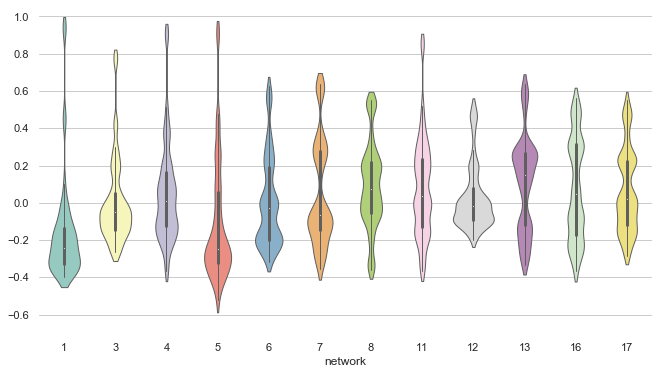

In [2]:
sns.set(style="whitegrid")

# 使用seaborn官方提供的資料 Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# 取用指定資料 Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# 運算相關矩陣以及平均 Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# 設定窗口 Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# 繪製小提琴圖(以較窄的寬度) Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# 最終化圖形 Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## 熱圖 Heatmap
熱圖以顏色變化來顯示資料，以色彩深淺直觀的來顯示數值大小。<br>
Heatmap show individual values in a matrix with different colors, allowing us to feel the data intuitively by just looking at the matrix.

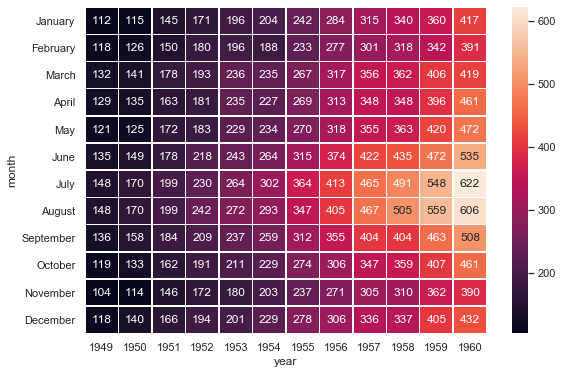

In [3]:
sns.set()

# 載入資料 Load data
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# 繪製顯示數值的熱圖 Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

## 嶺圖 Overlapping densities Ridge plot (FacetGrid)

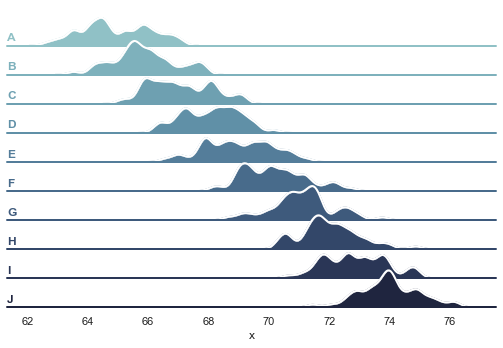

In [4]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# 創建資料 Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# 初始化網格化對象 Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# 繪製密度 Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# 定義成函數 Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# 讓子圖重疊 Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# 移除一些不必要的座標資訊 Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

## 核密度估計 KDE plot
多個雙變量的核密度估計圖。<br>
Multiple bivariate KDE plots.

Text(3.8, 4.5, 'setosa')

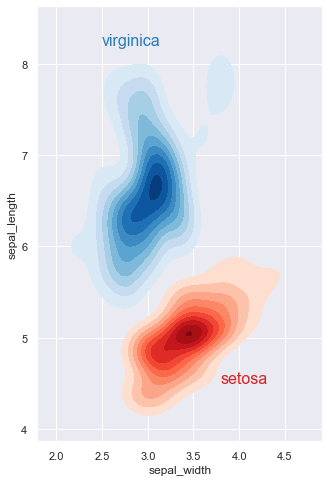

In [5]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# 指定鳶尾花子集 Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# 設定視窗 Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# 繪製核密度估計圖 Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# 加上標籤 Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

## 群集熱圖 Clustermap
群集熱圖有兩個部分 - 數值色塊熱圖與分類樹狀圖。從數值色塊可以直觀觀測數據，而樹狀圖則可提供分組歸類結果。<br>
Clustermap contains two parts - heatmap and tree plot. The heatmap gives us intuition of the value, yet the tree plot show the clustering result.

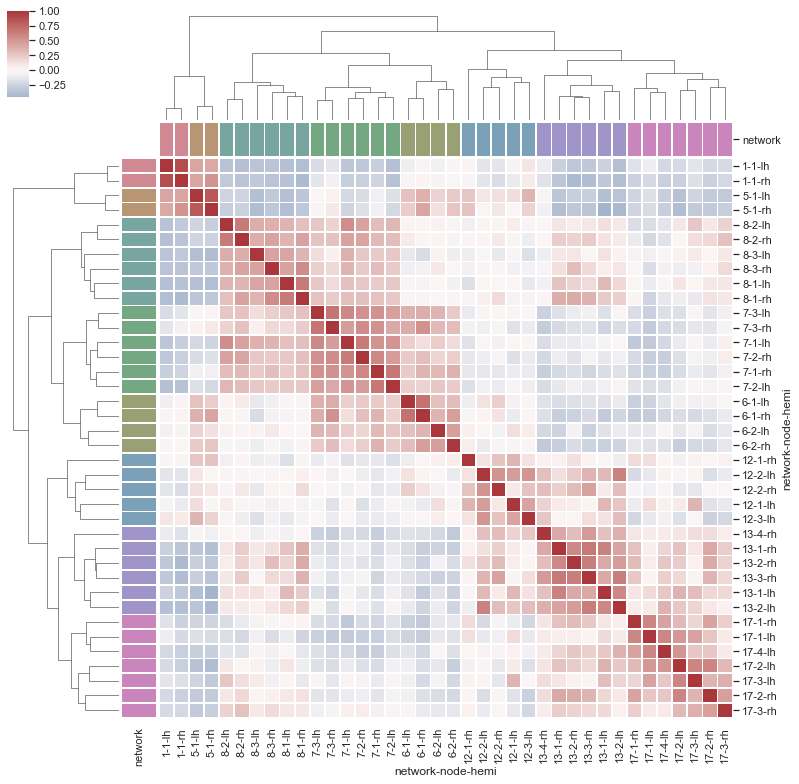

In [6]:
sns.set()
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# 為不同類別創建色盤 Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# 將色盤轉為向量，繪製在矩陣旁 Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# 繪圖 Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

## 小結 Summary
在五篇談論不同視覺化工具與圖表的介紹，想以這張從網路找到的[圖片](https://miro.medium.com/max/2200/1*i-3C6WP3f5dnNzOLdRF2cw.jpeg)做個小結。如果處理資料初期不曉得該繪製何種圖表，可以查找這張圖片作為參考。<br>

After five articles discussing different types of visualization tools and methods, [this picture](https://miro.medium.com/max/2200/1*i-3C6WP3f5dnNzOLdRF2cw.jpeg) from the internet is good way to sum up. When we have a set of data and not knowing which visualization method to use, looking up this picture might provide am idea.

![Title](1200.jpeg)

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] 第二屆機器學習百日馬拉松內容

[2] [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[3] [Seaborn: statistical data visualization](https://seaborn.pydata.org/)

[4] [給工程師的統計學及資料分析](https://www.slideshare.net/tw_dsconf/123-70852901?next_slideshow=1)

[5] [Visualizations](https://miro.medium.com/max/2200/1*i-3C6WP3f5dnNzOLdRF2cw.jpeg)
